<h1>First experiment</h1>

In [1]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt    
import seaborn
from IPython.display import Audio
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft
from scipy.io import wavfile
from scipy import signal

seaborn.set(style='ticks')

In [2]:
signal_array = []

signaal1, sr1 = librosa.load("output1voice.wav")
signaal2, sr2 = librosa.load("output2voice.wav")
signaal3, sr3 = librosa.load("output3voice.wav")
signaal4, sr4 = librosa.load("output4voice.wav")
signaal5, sr5 = librosa.load("output5voice.wav")
signaal6, sr6 = librosa.load("output6voice.wav")
signaal7, sr7 = librosa.load("output7voice.wav")
signaal8, sr8 = librosa.load("output8voice.wav")

signal_array.append(signaal1)
signal_array.append(signaal2)
signal_array.append(signaal3)
signal_array.append(signaal4)
signal_array.append(signaal5)
signal_array.append(signaal6)
signal_array.append(signaal7)
signal_array.append(signaal8)

In [3]:
signal_array2 = []

signaal1, sr1 = librosa.load("output9voice.wav")
signaal2, sr2 = librosa.load("output10voice.wav")
signaal3, sr3 = librosa.load("output11voice.wav")
signaal4, sr4 = librosa.load("output12voice.wav")
signaal5, sr5 = librosa.load("output13voice.wav")
signaal6, sr6 = librosa.load("output14voice.wav")
signaal7, sr7 = librosa.load("output15voice.wav")
signaal8, sr8 = librosa.load("output16voice.wav")

signal_array2.append(signaal1)
signal_array2.append(signaal2)
signal_array2.append(signaal3)
signal_array2.append(signaal4)
signal_array2.append(signaal5)
signal_array2.append(signaal6)
signal_array2.append(signaal7)
signal_array2.append(signaal8)

In [4]:
signal_array3 = []

signaal1, sr1 = librosa.load("output17voice.wav")
signaal2, sr2 = librosa.load("output18voice.wav")
signaal3, sr3 = librosa.load("output19voice.wav")
signaal4, sr4 = librosa.load("output20voice.wav")
signaal5, sr5 = librosa.load("output21voice.wav")
signaal6, sr6 = librosa.load("output22voice.wav")
signaal7, sr7 = librosa.load("output23voice.wav")
signaal8, sr8 = librosa.load("output24voice.wav")

signal_array3.append(signaal1)
signal_array3.append(signaal2)
signal_array3.append(signaal3)
signal_array3.append(signaal4)
signal_array3.append(signaal5)
signal_array3.append(signaal6)
signal_array3.append(signaal7)
signal_array3.append(signaal8)

In [5]:
signal_array4 = []

signaal1, sr1 = librosa.load("fourth_measure/output25voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output26voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output27voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output28voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output29voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output30voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output31voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output32voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output33voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output34voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output35voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output36voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output37voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output38voice.wav")


signal_array4.append(signaal1)
signal_array4.append(signaal2)
signal_array4.append(signaal3)
signal_array4.append(signaal4)
signal_array4.append(signaal5)
signal_array4.append(signaal6)
signal_array4.append(signaal7)
signal_array4.append(signaal8)
signal_array4.append(signaal9)
signal_array4.append(signaal10)
signal_array4.append(signaal11)
signal_array4.append(signaal12)
signal_array4.append(signaal13)
signal_array4.append(signaal14)

signal_array5 = []

signaal1, sr1 = librosa.load("fourth_measure/output39voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output40voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output41voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output42voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output43voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output44voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output45voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output46voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output47voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output48voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output49voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output50voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output51voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output52voice.wav")


signal_array5.append(signaal1)
signal_array5.append(signaal2)
signal_array5.append(signaal3)
signal_array5.append(signaal4)
signal_array5.append(signaal5)
signal_array5.append(signaal6)
signal_array5.append(signaal7)
signal_array5.append(signaal8)
signal_array5.append(signaal9)
signal_array5.append(signaal10)
signal_array5.append(signaal11)
signal_array5.append(signaal12)
signal_array5.append(signaal13)
signal_array5.append(signaal14)

signal_array6 = []

signaal1, sr1 = librosa.load("fourth_measure/output53voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output54voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output55voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output56voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output57voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output58voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output59voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output60voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output61voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output62voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output63voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output64voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output65voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output66voice.wav")


signal_array6.append(signaal1)
signal_array6.append(signaal2)
signal_array6.append(signaal3)
signal_array6.append(signaal4)
signal_array6.append(signaal5)
signal_array6.append(signaal6)
signal_array6.append(signaal7)
signal_array6.append(signaal8)
signal_array6.append(signaal9)
signal_array6.append(signaal10)
signal_array6.append(signaal11)
signal_array6.append(signaal12)
signal_array6.append(signaal13)
signal_array6.append(signaal14)

In [6]:
noise, sr99 = librosa.load("noise5.wav")
noise_delta, sr100 = librosa.load("noise_delta.wav")

<h2>SNR calculation</h2>

In [7]:
snr_list = []
snr_list2 = []
snr_list3 = []

snr_list4 = []
snr_list5 = []
snr_list6 = []

counter = 0
for sig in signal_array:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list2.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list3.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array4:
    noise_free_power = np.mean(np.square(noise_delta))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list4.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array5:
    noise_free_power = np.mean(np.square(noise_delta))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list5.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array6:
    noise_free_power = np.mean(np.square(noise_delta))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list6.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

SNR value for the recording number 1  (dB): 15.390338897705078
SNR value for the recording number 2  (dB): 13.076218366622925
SNR value for the recording number 3  (dB): 9.993770718574524
SNR value for the recording number 4  (dB): 6.117786169052124
SNR value for the recording number 5  (dB): 3.727346658706665
SNR value for the recording number 6  (dB): 3.972020745277405
SNR value for the recording number 7  (dB): 3.098652958869934
SNR value for the recording number 8  (dB): 3.4758782386779785
SNR value for the recording number 9  (dB): 14.286054372787476
SNR value for the recording number 10  (dB): 15.4360032081604
SNR value for the recording number 11  (dB): 8.460477590560913
SNR value for the recording number 12  (dB): 4.181914925575256
SNR value for the recording number 13  (dB): 3.1489303708076477
SNR value for the recording number 14  (dB): 2.7475643157958984
SNR value for the recording number 15  (dB): 3.0757594108581543
SNR value for the recording number 16  (dB): 3.30514192581

/tmp/ipykernel_12057/1995804292.py:41: RuntimeWarning: invalid value encountered in log10
  snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)


<h2>Speech recognition</h2>

In [8]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [9]:
sound = sr.AudioFile('fourth_measure/output62voice.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: püsiv stress võib muuta seda kuidas sa end tunned see võib tekitada depressiooni või sa võid haigeks jääda


<h2>Visual data representation, tests 1-3 for 4 meters, text audio</h2>

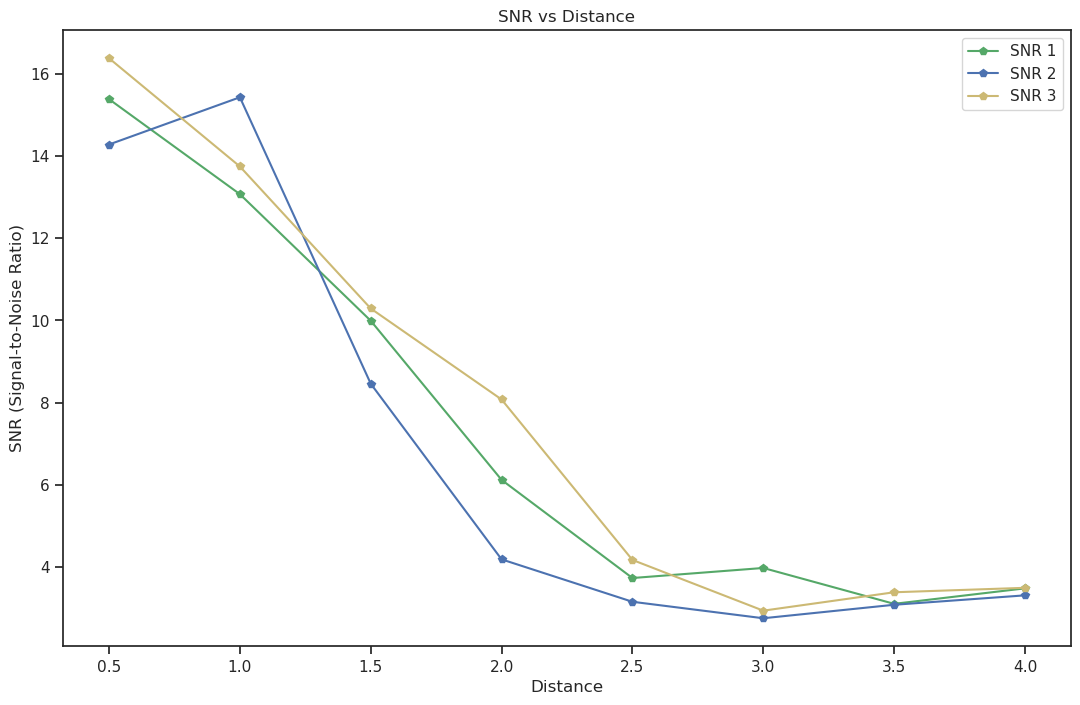

In [10]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

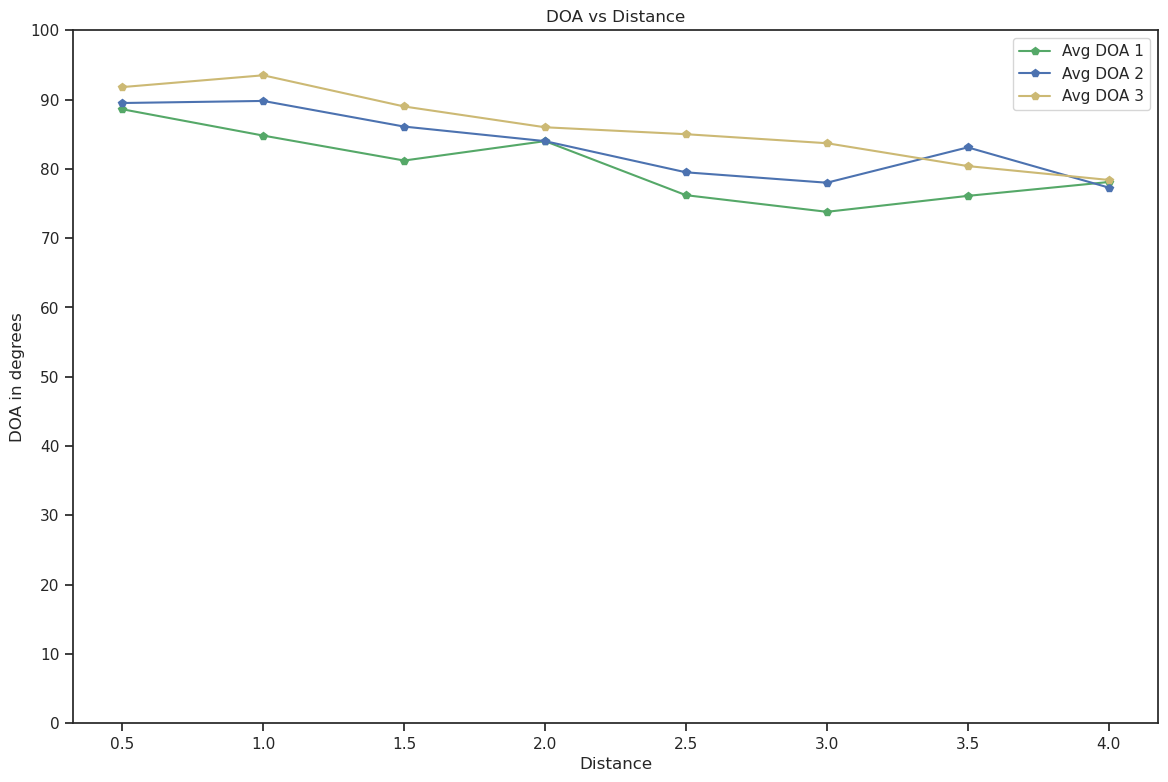

In [11]:
avg_doa = [88.6,84.8,81.2,84,76.2,73.8,76.1,78.1]
avg_doa2 = [89.5,89.8,86.1,84,79.5,78,83.1,77.3]
avg_doa3 = [91.8,93.5,89,86,85,83.7,80.4,78.4]


plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

#3d graph of either 0 to 90 angle with x for distance and y for distance and z for SNR
#do the same thing for 4 channels from recording, can we even do it - try to get the raw data
#Also measuring directly from one of four mics in the same way for either all channels combined or 4 channels separated.
#try to measure with a sinewave
#echo test? -> different envorinments, try the rough envs
#the reaction to multiple people talking?
#run the sin wive from 20 to 20000 Hz (frequency sweep) -> frequency response check in comparison to the mic graph on the website

#make an algorithm so that it would stick to one signal coming (so that the robot keep looking at you while others talking) -> for later


#for later -> for male/female voice/estonian speech with an accent

#DAW recording filterings? that's for later

#WER calculation word error rate


In [12]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

In [13]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "püsiv stress võib muuta seda kuidas sa end tunned see võib tekitada depressiooni või sa võid haigeks jääda"

for i in range(1,9):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(9,17):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(17,25):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.02830188679245283
Error rate:  0.02830188679245283
Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.02830188679245283
Error rate:  0.09433962264150944
Error rate:  0.02830188679245283
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377


In [14]:
error_rates4 = []
error_rates5 = []
error_rates6 = []

for i in range(25,39):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates4.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(39,53):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates5.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(53,67):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates6.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.018867924528301886
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.05660377358490566
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.07547169811320754
Error rate:  0.0660377358490566
Error rate:  0.05660377358490566
Error rate:  0.22641509433962265
Error rate:  0.19811320754716982
Error rate:  0.0660377358490566
Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.0

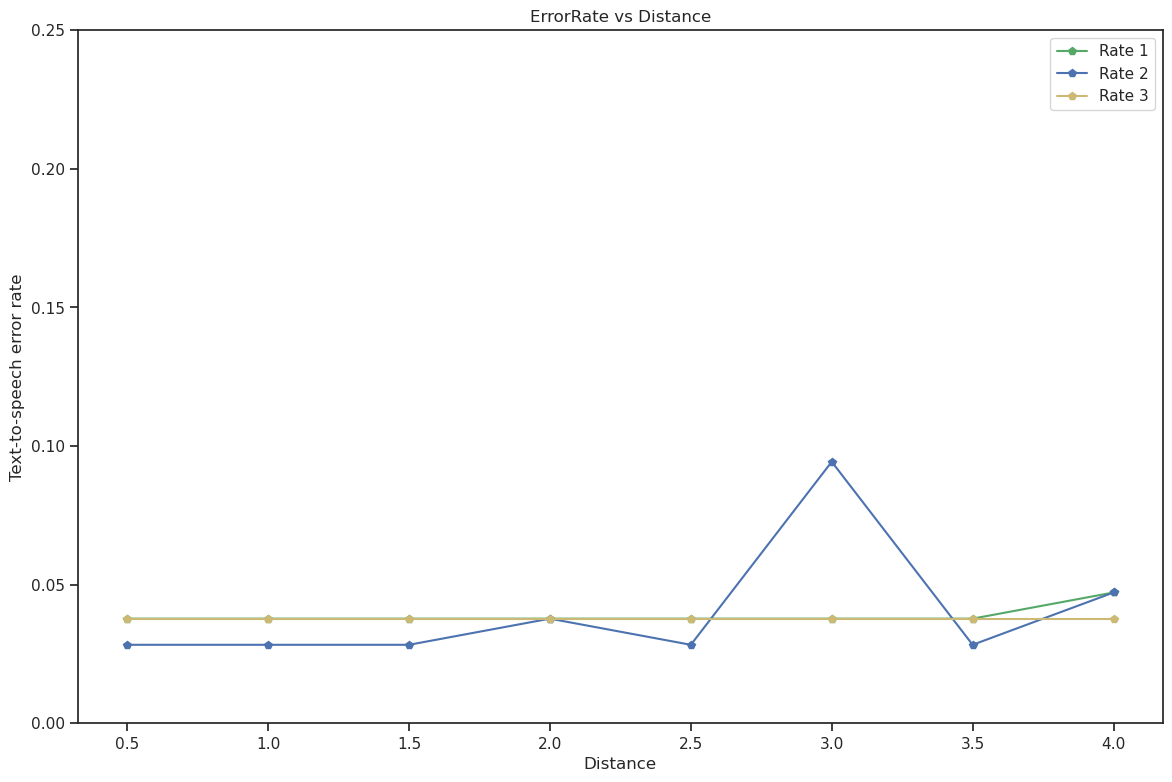

In [15]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.25)
plt.legend()
plt.show()

<h2>Visual data representation, tests 4-6 for 4> meters in Delta 2024, text audio</h2>

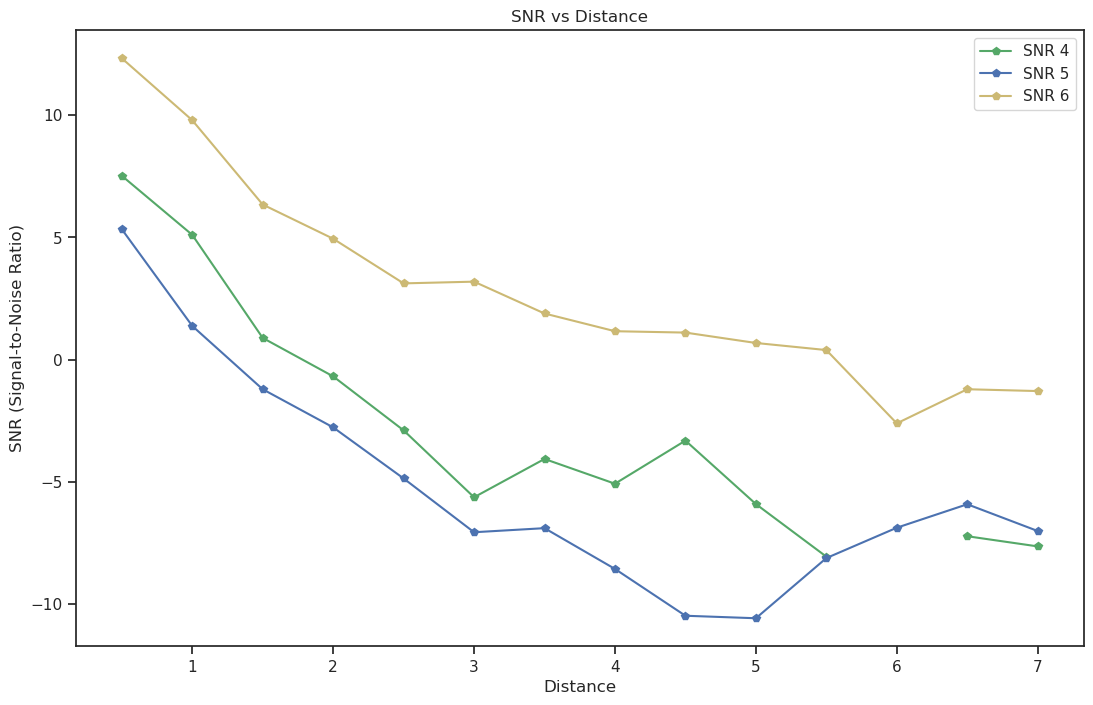

In [16]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list4, marker='p', linestyle='-', color='g', label='SNR 4')
plt.plot(distance_points, snr_list5, marker='p', linestyle='-', color='b', label='SNR 5')
plt.plot(distance_points, snr_list6, marker='p', linestyle='-', color='y', label='SNR 6')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

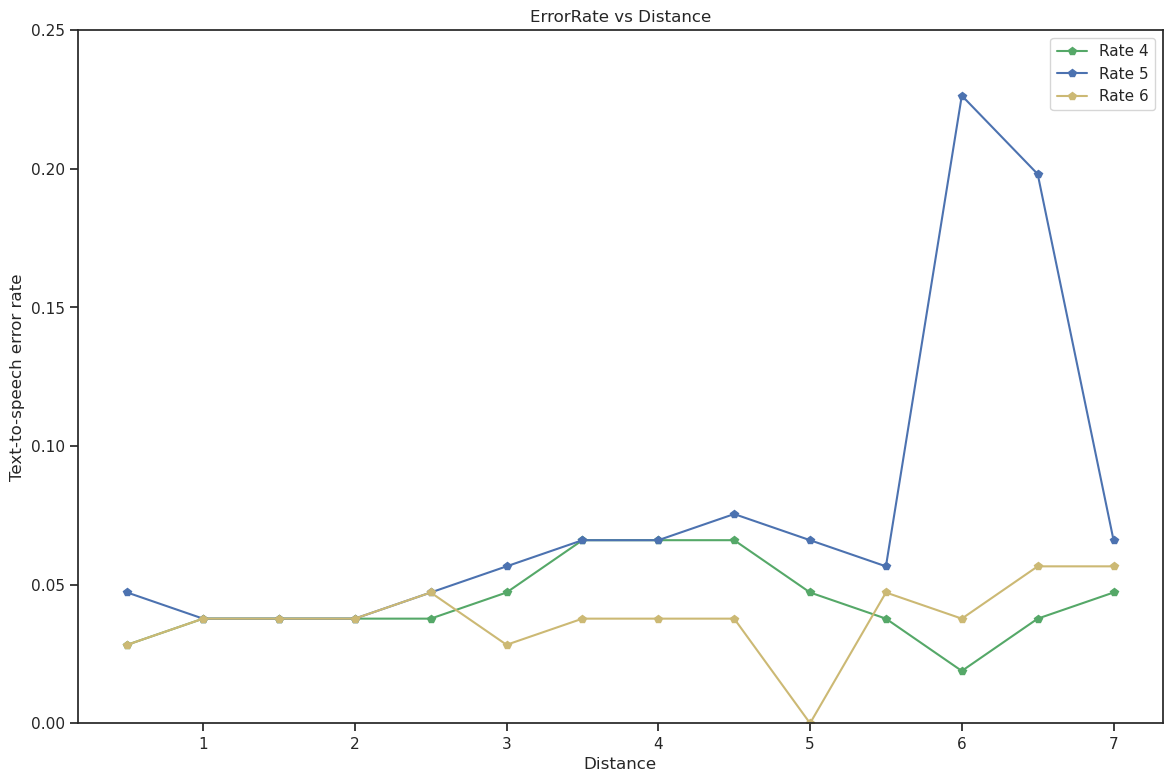

In [17]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates4, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates5, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates6, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.25)
plt.legend()
plt.show()

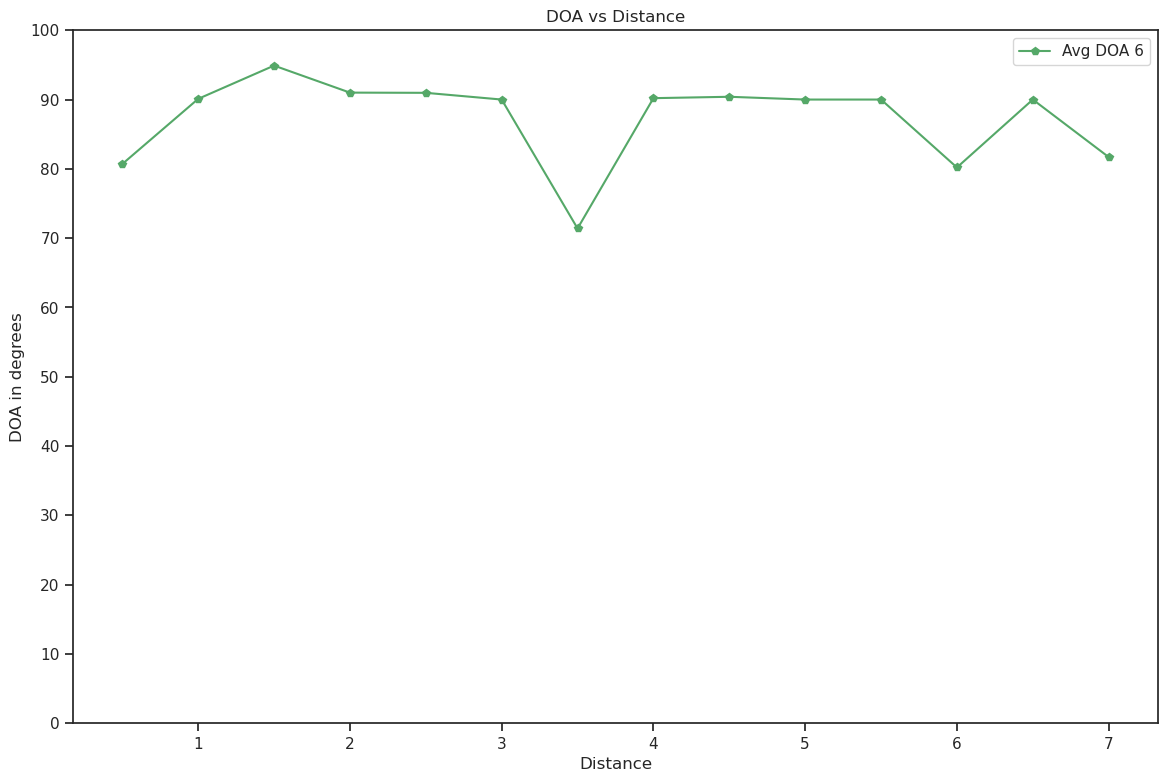

In [18]:
avg_doa6 = [80.7,90.1,94.9,91,90.97,90,71.4,90.2,90.4,90,90,80.2,90,81.7]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa6, marker='p', linestyle='-', color='g', label='Avg DOA 6')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

In [19]:
fig = go.Figure(data=
    go.Scatterpolar(
        r = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
        theta = avg_doa6,
        marker=dict(color='green'),
        mode = 'markers',
        name='Avg DOA 6',
    ))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

<h2>Sin measurements</h2>

In [20]:
signal_array_sin = []

signaal1, sr1 = librosa.load("fifth_measure/output1sin.wav")
signaal2, sr2 = librosa.load("fifth_measure/output2sin.wav")
signaal3, sr3 = librosa.load("fifth_measure/output3sin.wav")
signaal4, sr4 = librosa.load("fifth_measure/output4sin.wav")
signaal5, sr5 = librosa.load("fifth_measure/output5sin.wav")
signaal6, sr6 = librosa.load("fifth_measure/output6sin.wav")
signaal7, sr7 = librosa.load("fifth_measure/output7sin.wav")
signaal8, sr8 = librosa.load("fifth_measure/output8sin.wav")
signaal9, sr9 = librosa.load("fifth_measure/output9sin.wav")
signaal10, sr10 = librosa.load("fifth_measure/output10sin.wav")
signaal11, sr11 = librosa.load("fifth_measure/output11sin.wav")
signaal12, sr12 = librosa.load("fifth_measure/output12sin.wav")
signaal13, sr13 = librosa.load("fifth_measure/output13sin.wav")
signaal14, sr14 = librosa.load("fifth_measure/output14sin.wav")


signal_array_sin.append(signaal1)
signal_array_sin.append(signaal2)
signal_array_sin.append(signaal3)
signal_array_sin.append(signaal4)
signal_array_sin.append(signaal5)
signal_array_sin.append(signaal6)
signal_array_sin.append(signaal7)
signal_array_sin.append(signaal8)
signal_array_sin.append(signaal9)
signal_array_sin.append(signaal10)
signal_array_sin.append(signaal11)
signal_array_sin.append(signaal12)
signal_array_sin.append(signaal13)
signal_array_sin.append(signaal14)

In [21]:
noise, sr9 = librosa.load("noise_delta.wav")

In [22]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt

# Assuming 'noise' is your noise signal
noise_fft = fft.fft(noise)
noise_freq = fft.fftfreq(len(noise))

snr_list_sin = []
counter = 0

for sig in signal_array_sin:
    sig_fft = fft.fft(sig)
    sig_freq = fft.fftfreq(len(sig))

    # Find the index corresponding to the fundamental frequency in the signal
    fundamental_freq_index = np.argmax(np.abs(sig_fft))
    fundamental_freq = np.abs(sig_freq[fundamental_freq_index])

    # Exclude the fundamental frequency from the noise and signal
    noise_fft_without_fundamental = np.copy(noise_fft)
    noise_fft_without_fundamental[fundamental_freq_index] = 0

    sig_fft_without_fundamental = np.copy(sig_fft)
    sig_fft_without_fundamental[fundamental_freq_index] = 0

    # Calculate the power spectrum density excluding the fundamental frequency
    noise_power = np.abs(noise_fft_without_fundamental)**2
    signal_power = np.abs(sig_fft_without_fundamental)**2

    # Calculate the Signal-to-Noise Ratio (SNR) in dB
    snr = 10 * np.log10(np.sum(signal_power) / np.sum(noise_power))
    
    counter += 1
    print(f"SNR value for the recording number {counter} at fundamental frequency {fundamental_freq} Hz (dB):", snr)
    snr_list_sin.append(snr)

    # # Plotting the Sinusoidal Signal in Time Domain
    # plt.figure(figsize=(12, 4))
    # plt.subplot(1, 2, 1)
    # plt.plot(np.arange(len(sig)), sig)
    # plt.title('Sinusoidal Signal in Time Domain')
    # plt.xlabel('Sample')
    # plt.ylabel('Amplitude')

    # # Plotting the Sinusoidal Signal in Frequency Domain
    # plt.subplot(1, 2, 2)
    # plt.plot(sig_freq, np.abs(sig_fft))
    # plt.title('Sinusoidal Signal in Frequency Domain')
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Magnitude')
    # plt.tight_layout()
    # plt.show()


SNR value for the recording number 1 at fundamental frequency 0.01995294511892877 Hz (dB): 13.202894926071167
SNR value for the recording number 2 at fundamental frequency 0.01995294511892877 Hz (dB): 5.6687963008880615
SNR value for the recording number 3 at fundamental frequency 0.01995294511892877 Hz (dB): 14.913067817687988
SNR value for the recording number 4 at fundamental frequency 0.01995294511892877 Hz (dB): 7.325015664100647
SNR value for the recording number 5 at fundamental frequency 0.01995294511892877 Hz (dB): 1.8163982033729553
SNR value for the recording number 6 at fundamental frequency 0.01995294511892877 Hz (dB): 8.965805172920227
SNR value for the recording number 7 at fundamental frequency 0.01995294511892877 Hz (dB): 12.831214666366577
SNR value for the recording number 8 at fundamental frequency 0.01995294511892877 Hz (dB): 8.384287357330322
SNR value for the recording number 9 at fundamental frequency 0.01995294511892877 Hz (dB): 6.975208520889282
SNR value for 

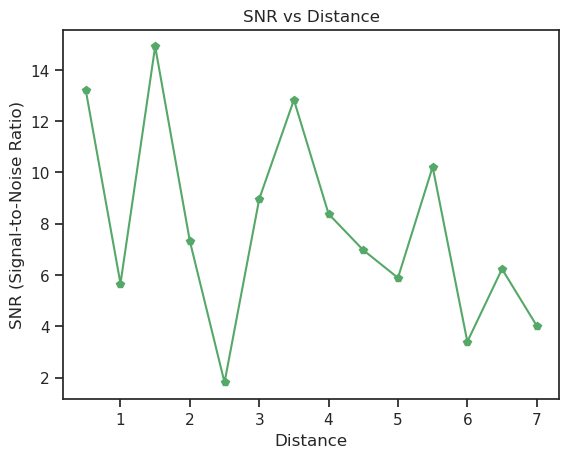

In [23]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]
plt.plot(distance_points, snr_list_sin, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.show()

#repeat, perhaps noise supresssion?
#transition to frequency domain of both sin and noise from time domain
#getting the SNR from the same sin measurement based on the fundamental tone and other dist/noise on other frequencies.
#sample rate of ppwer of 2 in the documenttaion of dft/ fft algorithm

<h2>Frequency response curve</h2>

In [24]:
sample_rate, audio_data = wavfile.read("sweep.wav") 
print(sample_rate)

16000


In [25]:
# # Perform FFT on the audio data
# fft_result = fft(audio_data)
# # Calculate the frequency values corresponding to the FFT result
# freq_values = np.fft.fftfreq(len(fft_result), 1/sample_rate)
# fig, ax = plt.subplots(figsize=(15, 8))
# # Set the frequency range and y-axis limits
# frequency_range = (20, 10000)
# y_axis_limits = (-60, 180)

# # Plot the frequency response curve
# plt.plot(freq_values, 20 * np.log10(np.abs(fft_result)))
# plt.xscale('log')  # Use a logarithmic scale for better visualization

# # Set x-axis and y-axis limits
# plt.xlim(frequency_range)
# plt.ylim(y_axis_limits)

# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude (dB)')
# plt.title('Frequency Response Curve')
# plt.grid(True)
# plt.show()


In [26]:
# fft_result = fft(audio_data)

# # Calculate the frequency values corresponding to the FFT result
# freq_values = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# # Find the index corresponding to 1 kHz
# one_khz_index = np.argmin(np.abs(freq_values - 1000))

# # Normalize the magnitude by the value at 1 kHz
# normalized_magnitude = 20 * np.log10(np.abs(fft_result) / np.abs(fft_result[one_khz_index]))

# # Set the frequency range and y-axis limits
# frequency_range = (20, 10000)
# y_axis_limits = (-100, 100)

# # Plot the frequency response curve
# fig, ax = plt.subplots(figsize=(15, 8))
# plt.plot(freq_values, normalized_magnitude)
# plt.xscale('log')  # Use a logarithmic scale for better visualization

# # Set x-axis and y-axis limits
# plt.xlim(frequency_range)
# plt.ylim(y_axis_limits)

# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude (dB)')
# plt.title('Normalized Frequency Response Curve (1 kHz as reference)')
# plt.grid(True)
# plt.show()

<h1>Second experiment, without ALL OFF, default config</h1>

In [55]:
snr_list4 = []
snr_list5 = []
snr_list6 = []

In [56]:
signal_array4 = []

signaal1, sr1 = librosa.load("sixth_measure/output1voicedef.wav")
signaal2, sr2 = librosa.load("sixth_measure/output2voicedef.wav")
signaal3, sr3 = librosa.load("sixth_measure/output3voicedef.wav")
signaal4, sr4 = librosa.load("sixth_measure/output4voicedef.wav")
signaal5, sr5 = librosa.load("sixth_measure/output5voicedef.wav")
signaal6, sr6 = librosa.load("sixth_measure/output6voicedef.wav")
signaal7, sr7 = librosa.load("sixth_measure/output7voicedef.wav")
signaal8, sr8 = librosa.load("sixth_measure/output8voicedef.wav")
signaal9, sr9 = librosa.load("sixth_measure/output9voicedef.wav")
signaal10, sr10 = librosa.load("sixth_measure/output10voicedef.wav")
signaal11, sr11 = librosa.load("sixth_measure/output11voicedef.wav")
signaal12, sr12 = librosa.load("sixth_measure/output12voicedef.wav")
signaal13, sr13 = librosa.load("sixth_measure/output13voicedef.wav")
signaal14, sr14 = librosa.load("sixth_measure/output14voicedef.wav")


signal_array4.append(signaal1)
signal_array4.append(signaal2)
signal_array4.append(signaal3)
signal_array4.append(signaal4)
signal_array4.append(signaal5)
signal_array4.append(signaal6)
signal_array4.append(signaal7)
signal_array4.append(signaal8)
signal_array4.append(signaal9)
signal_array4.append(signaal10)
signal_array4.append(signaal11)
signal_array4.append(signaal12)
signal_array4.append(signaal13)
signal_array4.append(signaal14)

signal_array5 = []

signaal1, sr1 = librosa.load("sixth_measure/output15voicedef.wav")
signaal2, sr2 = librosa.load("sixth_measure/output16voicedef.wav")
signaal3, sr3 = librosa.load("sixth_measure/output17voicedef.wav")
signaal4, sr4 = librosa.load("sixth_measure/output18voicedef.wav")
signaal5, sr5 = librosa.load("sixth_measure/output19voicedef.wav")
signaal6, sr6 = librosa.load("sixth_measure/output20voicedef.wav")
signaal7, sr7 = librosa.load("sixth_measure/output21voicedef.wav")
signaal8, sr8 = librosa.load("sixth_measure/output22voicedef.wav")
signaal9, sr9 = librosa.load("sixth_measure/output23voicedef.wav")
signaal10, sr10 = librosa.load("sixth_measure/output24voicedef.wav")
signaal11, sr11 = librosa.load("sixth_measure/output25voicedef.wav")
signaal12, sr12 = librosa.load("sixth_measure/output26voicedef.wav")
signaal13, sr13 = librosa.load("sixth_measure/output27voicedef.wav")
signaal14, sr14 = librosa.load("sixth_measure/output28voicedef.wav")


signal_array5.append(signaal1)
signal_array5.append(signaal2)
signal_array5.append(signaal3)
signal_array5.append(signaal4)
signal_array5.append(signaal5)
signal_array5.append(signaal6)
signal_array5.append(signaal7)
signal_array5.append(signaal8)
signal_array5.append(signaal9)
signal_array5.append(signaal10)
signal_array5.append(signaal11)
signal_array5.append(signaal12)
signal_array5.append(signaal13)
signal_array5.append(signaal14)

signal_array6 = []

signaal1, sr1 = librosa.load("sixth_measure/output29voicedef.wav")
signaal2, sr2 = librosa.load("sixth_measure/output30voicedef.wav")
signaal3, sr3 = librosa.load("sixth_measure/output31voicedef.wav")
signaal4, sr4 = librosa.load("sixth_measure/output32voicedef.wav")
signaal5, sr5 = librosa.load("sixth_measure/output33voicedef.wav")
signaal6, sr6 = librosa.load("sixth_measure/output34voicedef.wav")
signaal7, sr7 = librosa.load("sixth_measure/output35voicedef.wav")
signaal8, sr8 = librosa.load("sixth_measure/output36voicedef.wav")
signaal9, sr9 = librosa.load("sixth_measure/output37voicedef.wav")
signaal10, sr10 = librosa.load("sixth_measure/output38voicedef.wav")
signaal11, sr11 = librosa.load("sixth_measure/output39voicedef.wav")
signaal12, sr12 = librosa.load("sixth_measure/output40voicedef.wav")
signaal13, sr13 = librosa.load("sixth_measure/output41voicedef.wav")
signaal14, sr14 = librosa.load("sixth_measure/output42voicedef.wav")


signal_array6.append(signaal1)
signal_array6.append(signaal2)
signal_array6.append(signaal3)
signal_array6.append(signaal4)
signal_array6.append(signaal5)
signal_array6.append(signaal6)
signal_array6.append(signaal7)
signal_array6.append(signaal8)
signal_array6.append(signaal9)
signal_array6.append(signaal10)
signal_array6.append(signaal11)
signal_array6.append(signaal12)
signal_array6.append(signaal13)
signal_array6.append(signaal14)

noise_delta_2, sr100 = librosa.load("noise_delta_2.wav")

In [57]:
counter  =  0

In [58]:
for sig in signal_array4:
    noise_free_power = np.mean(np.square(noise_delta_2))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10(signal_power/noise_free_power - 1)
    counter = counter + 1
    snr_list4.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array5:
    noise_free_power = np.mean(np.square(noise_delta_2))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10(signal_power/noise_free_power - 1)
    counter = counter + 1
    snr_list5.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array6:
    noise_free_power = np.mean(np.square(noise_delta_2))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10(signal_power/noise_free_power - 1)
    counter = counter + 1
    snr_list6.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

SNR value for the recording number 1  (dB): 9.956261412126088
SNR value for the recording number 2  (dB): 7.0022830863644465
SNR value for the recording number 3  (dB): 7.708829754213653
SNR value for the recording number 4  (dB): 6.949628156089665
SNR value for the recording number 5  (dB): 8.79409690329614
SNR value for the recording number 6  (dB): 6.545788440682241
SNR value for the recording number 7  (dB): 7.469945171933272
SNR value for the recording number 8  (dB): 9.407655020891712
SNR value for the recording number 9  (dB): 5.950488143659703
SNR value for the recording number 10  (dB): 9.135867440274872
SNR value for the recording number 11  (dB): 7.052690629983451
SNR value for the recording number 12  (dB): 6.682116204913906
SNR value for the recording number 13  (dB): 6.843692404935755
SNR value for the recording number 14  (dB): 8.223564671443901
SNR value for the recording number 15  (dB): 10.386848155017855
SNR value for the recording number 16  (dB): 8.957517929472651


/tmp/ipykernel_12057/373037342.py:14: RuntimeWarning:

invalid value encountered in log10



In [53]:
sound = sr.AudioFile('sixth_measure/output2voicedef.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: soov täiuslik olla frustreerib sind sest täiuslik olla on võimatu kuid me saame alati proovida paremad olla


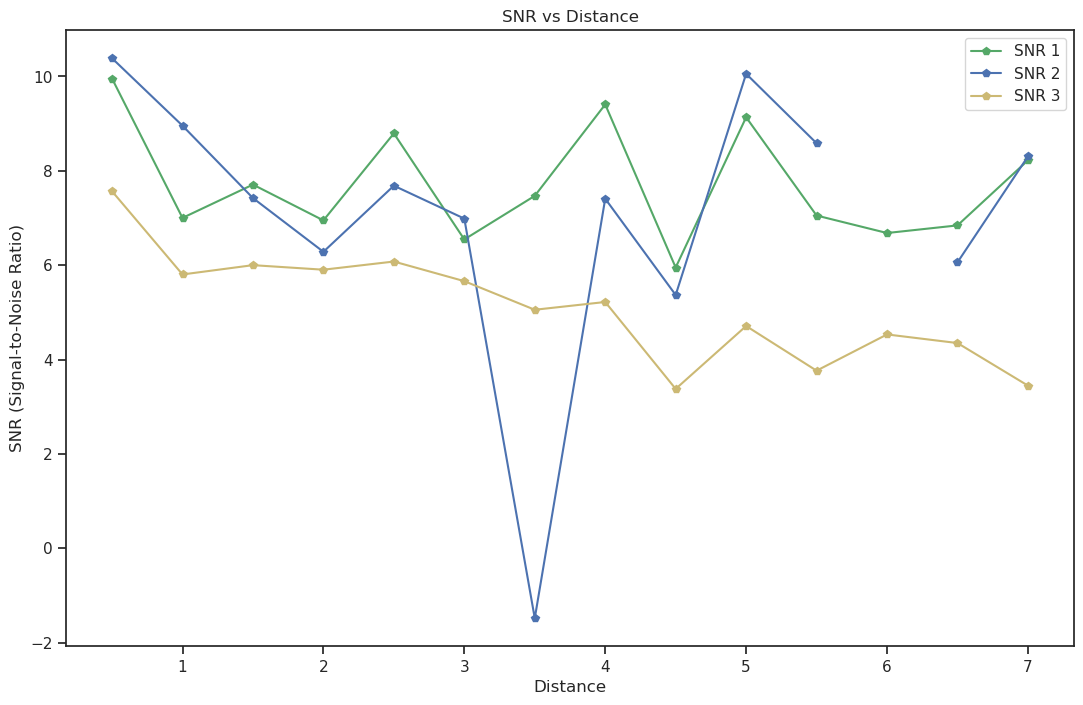

In [59]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list4, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list5, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list6, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

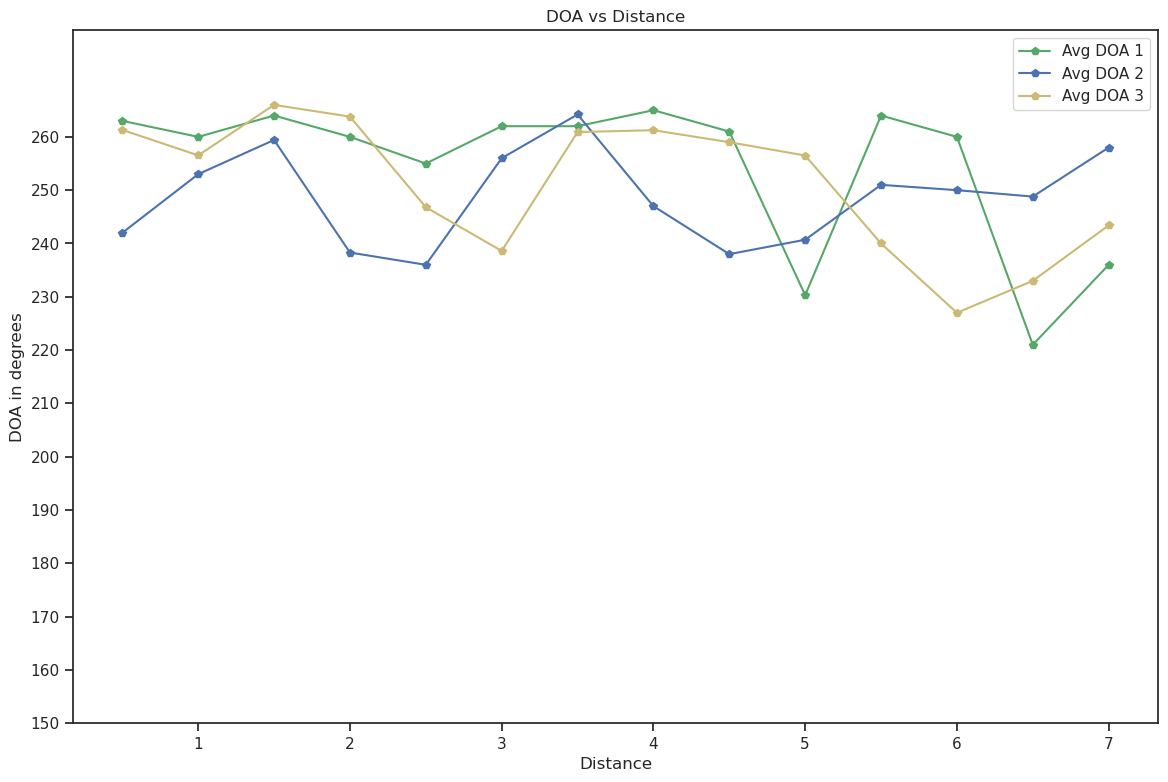

In [33]:
avg_doa = [263,260,264,260,255,262,262,265,261,230.3,264,260,221,236]
avg_doa2 = [242,253,259.42,238.3,236,256,264.2,247,238,240.7,251,250,248.8,258]
avg_doa3 = [261.3,256.53,266,263.8,246.8,238.6,260.9,261.25,259,256.5,240,227,233,243.4]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(150, 280)
plt.yticks(np.arange(150, 270, 10)) 
plt.legend()  

plt.show()

In [34]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

In [35]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "soov täiuslik olla frustreerib sind sest täiuslik olla on võimatu kuid me saame alati proovida paremad olla"

for i in range(1,15):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.037383177570093455
Error rate:  0.0
Error rate:  0.037383177570093455
Error rate:  0.0
Error rate:  0.0
Error rate:  0.0
Error rate:  0.04672897196261682
Error rate:  0.04672897196261682
Error rate:  0.04672897196261682
Error rate:  0.14953271028037382
Error rate:  0.018691588785046728
Error rate:  0.12149532710280374
Error rate:  0.04672897196261682
Error rate:  0.09345794392523364
Error rate:  0.0
Error rate:  0.0
Error rate:  0.037383177570093455
Error rate:  0.07476635514018691
Error rate:  0.0
Error rate:  0.0
Error rate:  0.07476635514018691
Error rate:  0.0
Error rate:  0.037383177570093455
Error rate:  0.009345794392523364
Error rate:  0.04672897196261682
Error rate:  0.037383177570093455
Error rate:  0.08411214953271028
Error rate:  0.009345794392523364
Error rate:  0.0
Error rate:  0.0
Error rate:  0.009345794392523364
Error rate:  0.028037383177570093
Error rate:  0.04672897196261682
Error rate:  0.08411214953271028
Error rate:  0.056074766355140186
Error rate

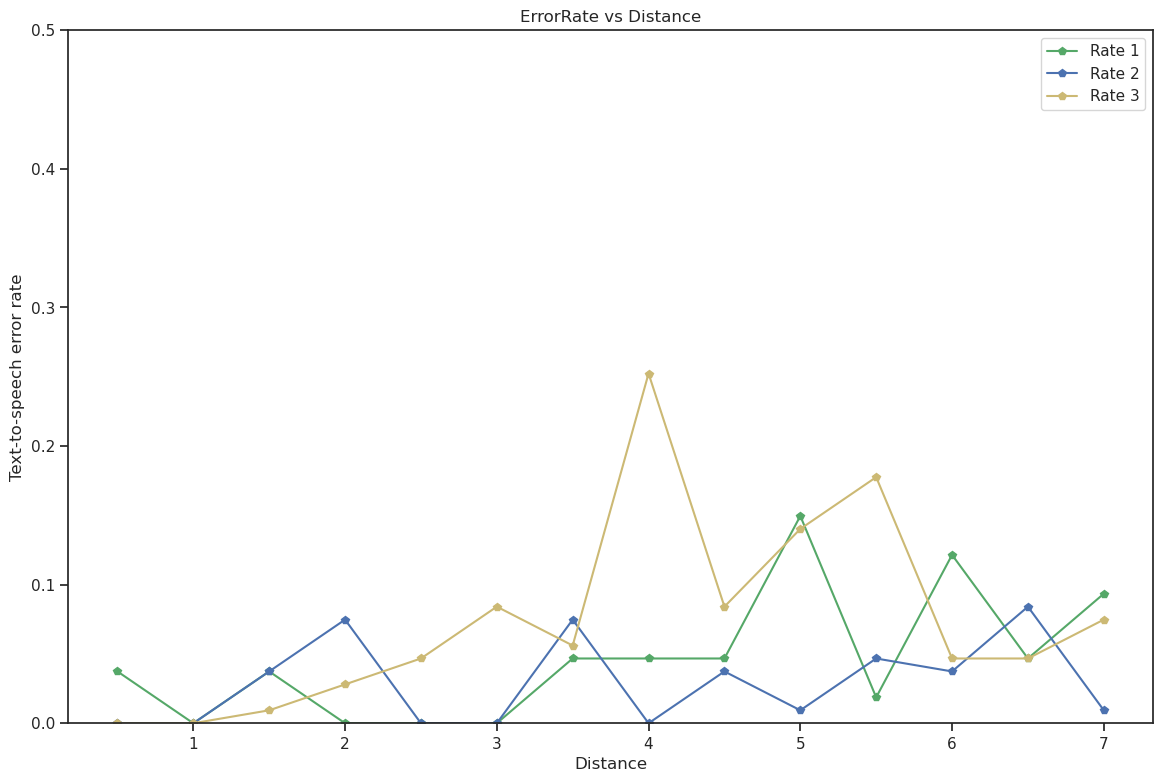

In [36]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.5)
plt.legend()
plt.show()

WORD ERROR RATE CALCULATION

In [37]:
import werpy

In [38]:
error_rates = []
error_rates2 = []
error_rates3 = []

correct = "soov täiuslik olla frustreerib sind sest täiuslik olla on võimatu kuid me saame alati proovida paremad olla"

for i in range(1,15):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'sixth_measure/output{i}voicedef.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)


Word error rate:  0.11764705882352941
Word error rate:  0.0
Word error rate:  0.11764705882352941
Word error rate:  0.0
Word error rate:  0.0
Word error rate:  0.0
Word error rate:  0.17647058823529413
Word error rate:  0.11764705882352941
Word error rate:  0.17647058823529413
Word error rate:  0.4117647058823529
Word error rate:  0.17647058823529413
Word error rate:  0.23529411764705882
Word error rate:  0.17647058823529413
Word error rate:  0.29411764705882354
Word error rate:  0.0
Word error rate:  0.0
Word error rate:  0.11764705882352941
Word error rate:  0.23529411764705882
Word error rate:  0.0
Word error rate:  0.0
Word error rate:  0.11764705882352941
Word error rate:  0.0
Word error rate:  0.11764705882352941
Word error rate:  0.058823529411764705
Word error rate:  0.17647058823529413
Word error rate:  0.11764705882352941
Word error rate:  0.11764705882352941
Word error rate:  0.058823529411764705
Word error rate:  0.0
Word error rate:  0.0
Word error rate:  0.058823529411764

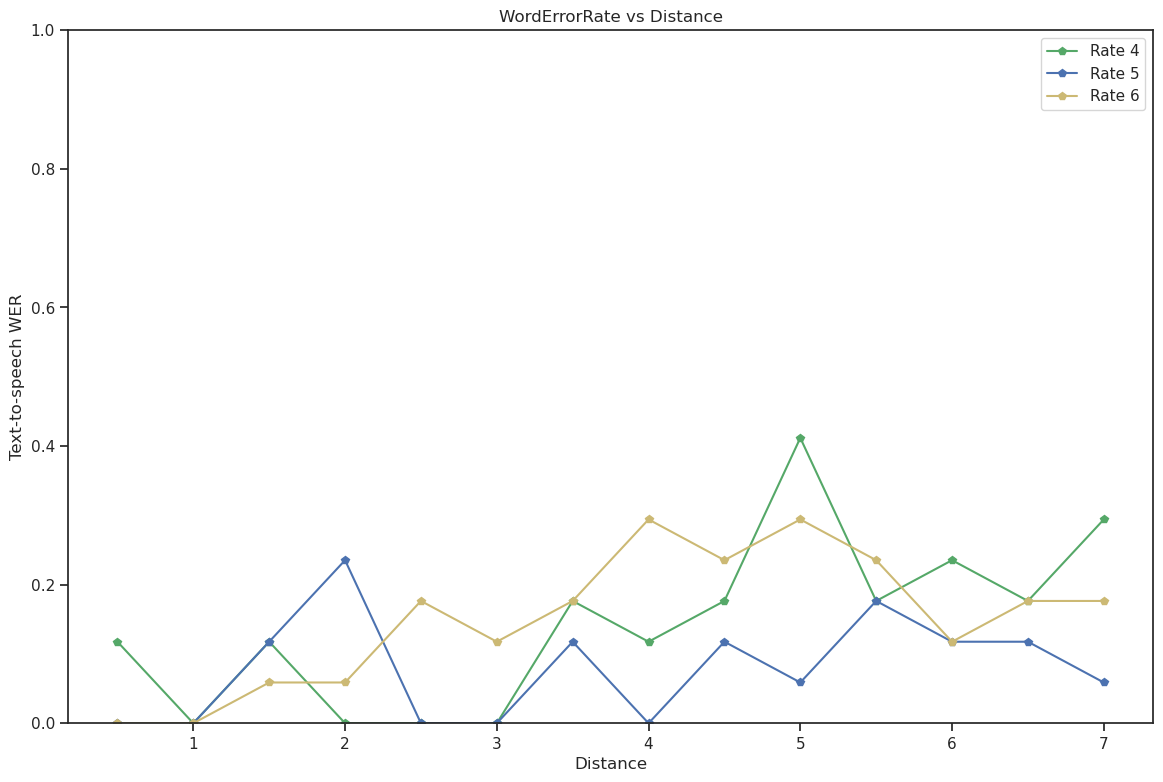

In [39]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech WER')
plt.title('WordErrorRate vs Distance')
plt.ylim(0,1)
plt.legend()
plt.show()

<h1>CORRECT MEASUREMENTS AND CALCULATIONS STARTING FROM HERE</h1>

<h2>First experiment, without ALL OFF, default config</h2>

In [1]:
import werpy
import librosa
import numpy as np
import matplotlib.pyplot as plt    
import seaborn
from scipy.fft import fft
import plotly.graph_objects as go


seaborn.set(style='ticks')

In [24]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [3]:
sound = sr.AudioFile('seventh_measure/noutput3.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: paljud annavad all päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia


In [4]:
signal_array1 = []
signal_array2 = []
signal_array3 = []

for i in range(1, 15):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array1.append(signal)

for i in range(15, 29):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array2.append(signal)

for i in range(29, 43):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array3.append(signal)

In [5]:
noise_delta_3, sr1 = librosa.load("noise_delta_3.wav")

In [6]:
def snr(x, y):
    noise_free_power = np.mean(np.square(y))
    signal_power = np.mean(np.square(x))

    snr_value = 10 * np.log10(signal_power / noise_free_power)
    return snr_value


snr_list1 = []
for sig in signal_array1:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list1.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list2 = []
for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list2.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list3 = []
for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list3.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

SNR value for the recording (dB): 26.076860427856445
SNR value for the recording (dB): 23.363535404205322
SNR value for the recording (dB): 24.422783851623535
SNR value for the recording (dB): 24.224863052368164
SNR value for the recording (dB): 25.00375509262085
SNR value for the recording (dB): 24.2207670211792
SNR value for the recording (dB): 24.663214683532715
SNR value for the recording (dB): 24.318654537200928
SNR value for the recording (dB): 24.767024517059326
SNR value for the recording (dB): 22.970569133758545
SNR value for the recording (dB): 24.686243534088135
SNR value for the recording (dB): 24.493353366851807
SNR value for the recording (dB): 24.43892478942871
SNR value for the recording (dB): 25.0156831741333
SNR value for the recording (dB): 28.348050117492676
SNR value for the recording (dB): 22.860090732574463
SNR value for the recording (dB): 24.56376075744629
SNR value for the recording (dB): 21.398210525512695
SNR value for the recording (dB): 24.73628044128418
S

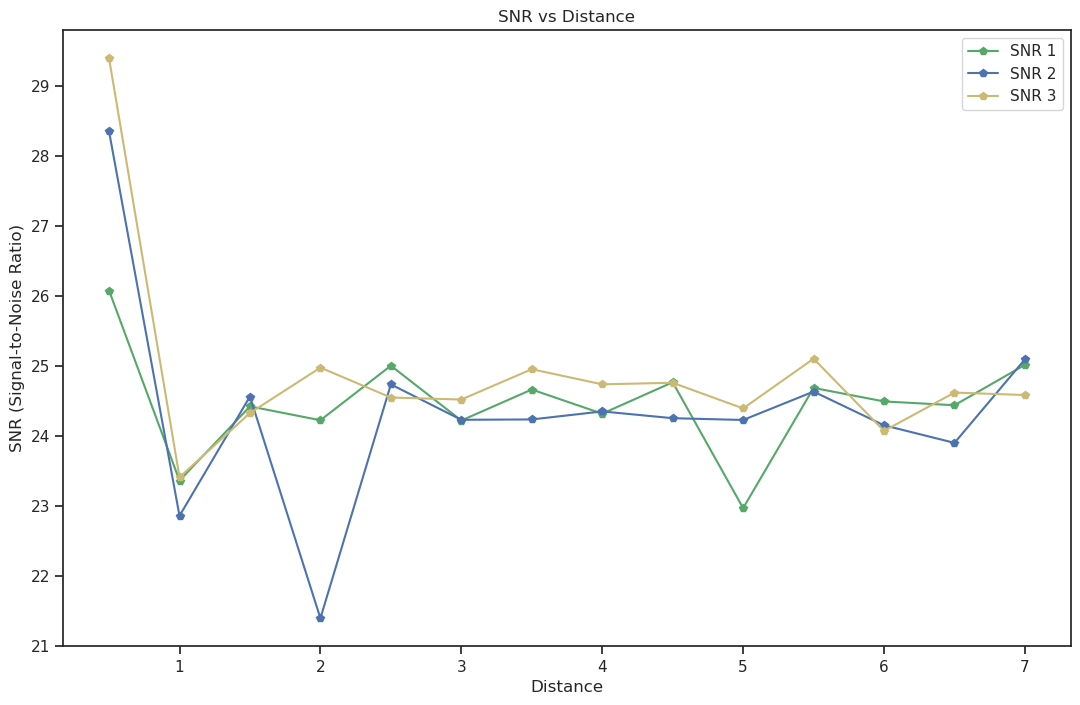

In [7]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list1, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

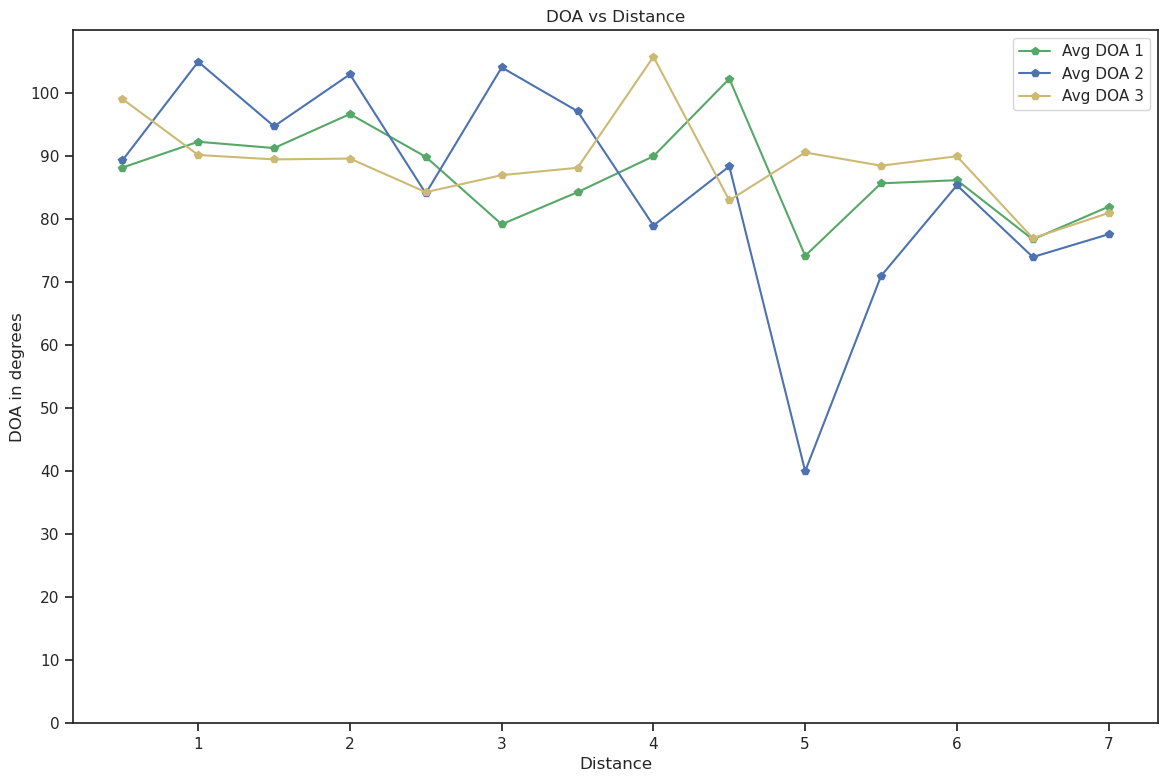

In [8]:
avg_doa = [88.2, 92.3, 91.3, 96.7, 89.9, 79.2, 84.3, 90, 102.3,74.2, 85.7, 86.2, 76.8, 82]
avg_doa2 = [89.33,105,94.75,103,84.1,104.1,97.15,79,88.4,40,71,85.4,74,77.62]
avg_doa3 = [99.1,90.2,89.5,89.63,84.3,87,88.17,105.8,83,90.6,88.5,90,77,81]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0,110)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

In [13]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.013605442176870748
Error rate:  0.027210884353741496
Error rate:  0.05442176870748299
Error rate:  0.05442176870748299
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.02040816326530612
Error rate:  0.02040816326530612
Error rate:  0.013605442176870748
Error rate:  0.05442176870748299
Error rate:  0.034013605442176874
Error rate:  0.0068

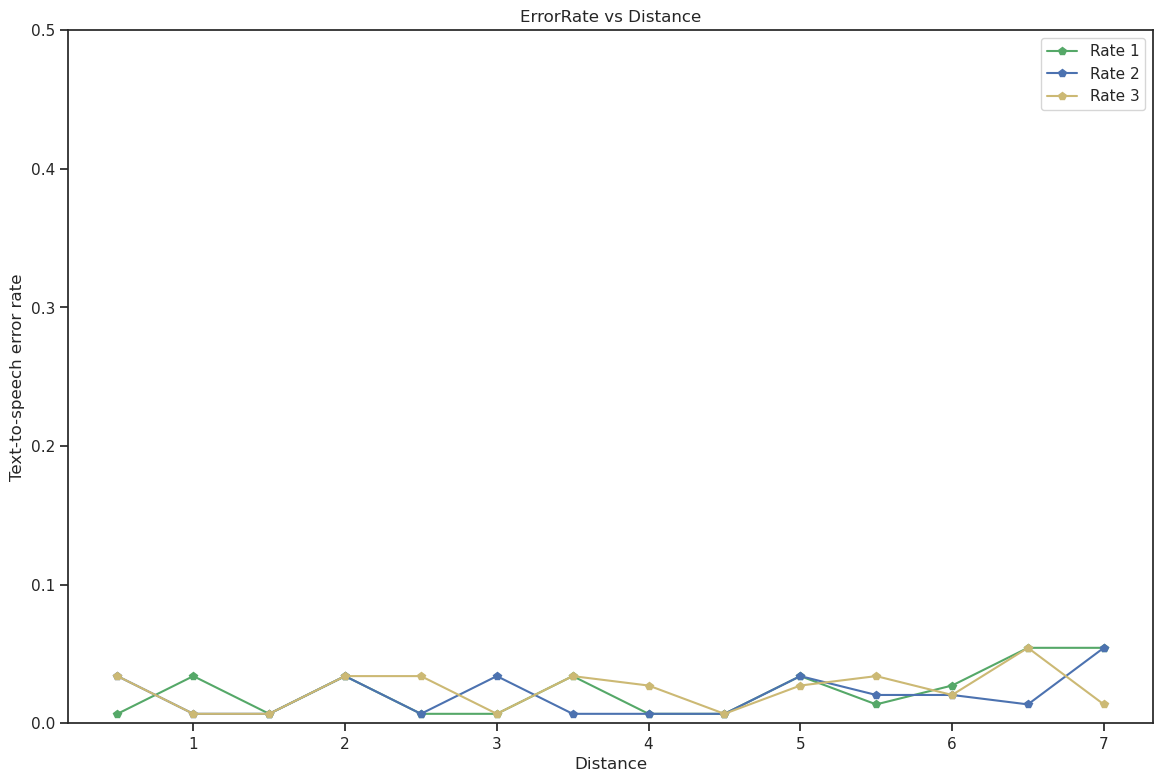

In [14]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.5)
plt.legend()
plt.show()

In [15]:
error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)


Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.14285714285714285
Word error rate:  0.14285714285714285
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.142857142

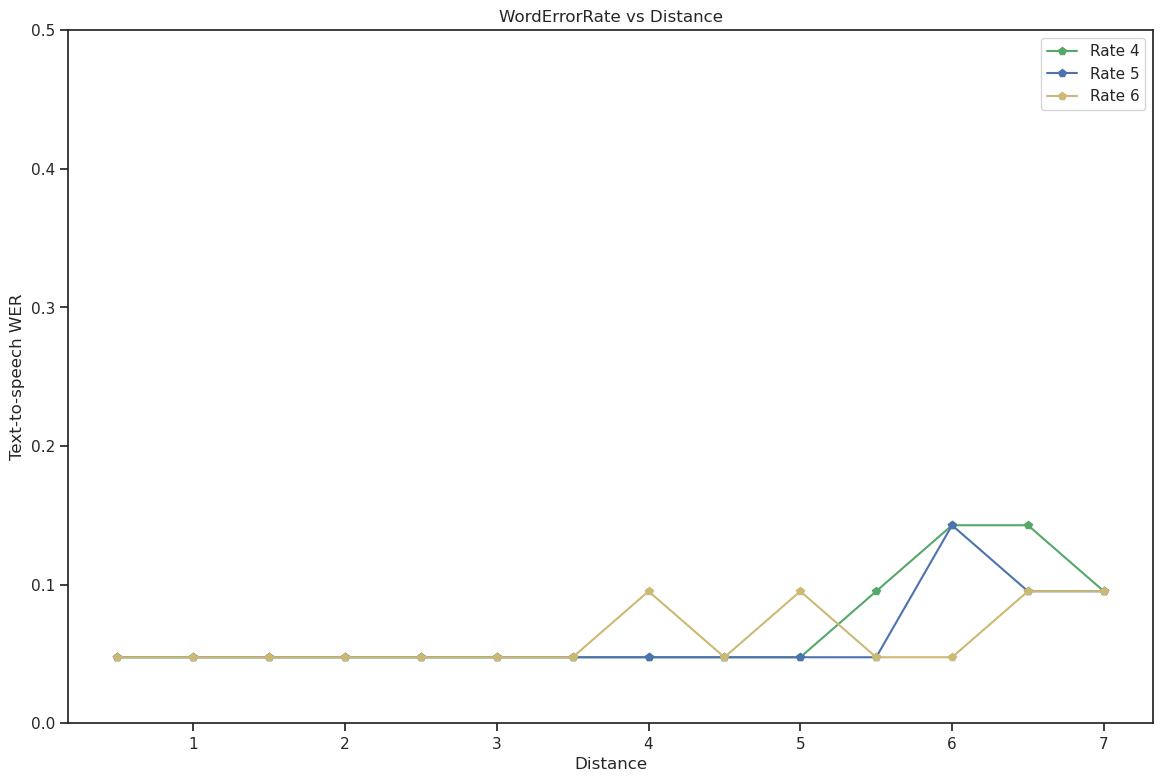

In [16]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech WER')
plt.title('WordErrorRate vs Distance')
plt.ylim(0,0.5)
plt.legend()
plt.show()

<h2>Second experiment, ALL OFF</h2>

In [17]:
signal_array1 = []
signal_array2 = []
signal_array3 = []

for i in range(1, 15):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array1.append(signal)

for i in range(15, 29):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array2.append(signal)

for i in range(29, 43):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array3.append(signal)

In [18]:
snr_list1 = []
for sig in signal_array1:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list1.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list2 = []
for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list2.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list3 = []
for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list3.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

SNR value for the recording (dB): 40.32097339630127
SNR value for the recording (dB): 36.41381502151489
SNR value for the recording (dB): 34.53256130218506
SNR value for the recording (dB): 33.039512634277344
SNR value for the recording (dB): 32.5124192237854
SNR value for the recording (dB): 31.540746688842773
SNR value for the recording (dB): 30.836870670318604
SNR value for the recording (dB): 30.578312873840332
SNR value for the recording (dB): 30.989556312561035
SNR value for the recording (dB): 30.802419185638428
SNR value for the recording (dB): 30.731210708618164
SNR value for the recording (dB): 30.346004962921143
SNR value for the recording (dB): 30.378870964050293
SNR value for the recording (dB): 30.61816930770874
SNR value for the recording (dB): 40.090999603271484
SNR value for the recording (dB): 36.3482928276062
SNR value for the recording (dB): 34.61737871170044
SNR value for the recording (dB): 33.042757511138916
SNR value for the recording (dB): 32.41904258728027
SNR

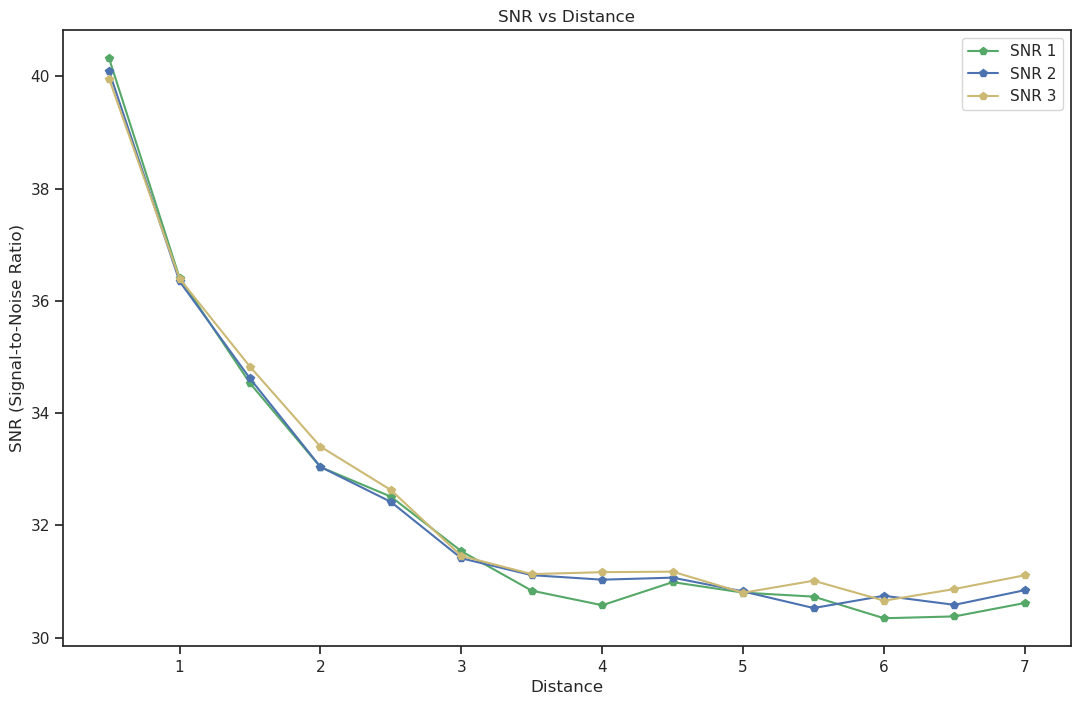

In [19]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list1, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

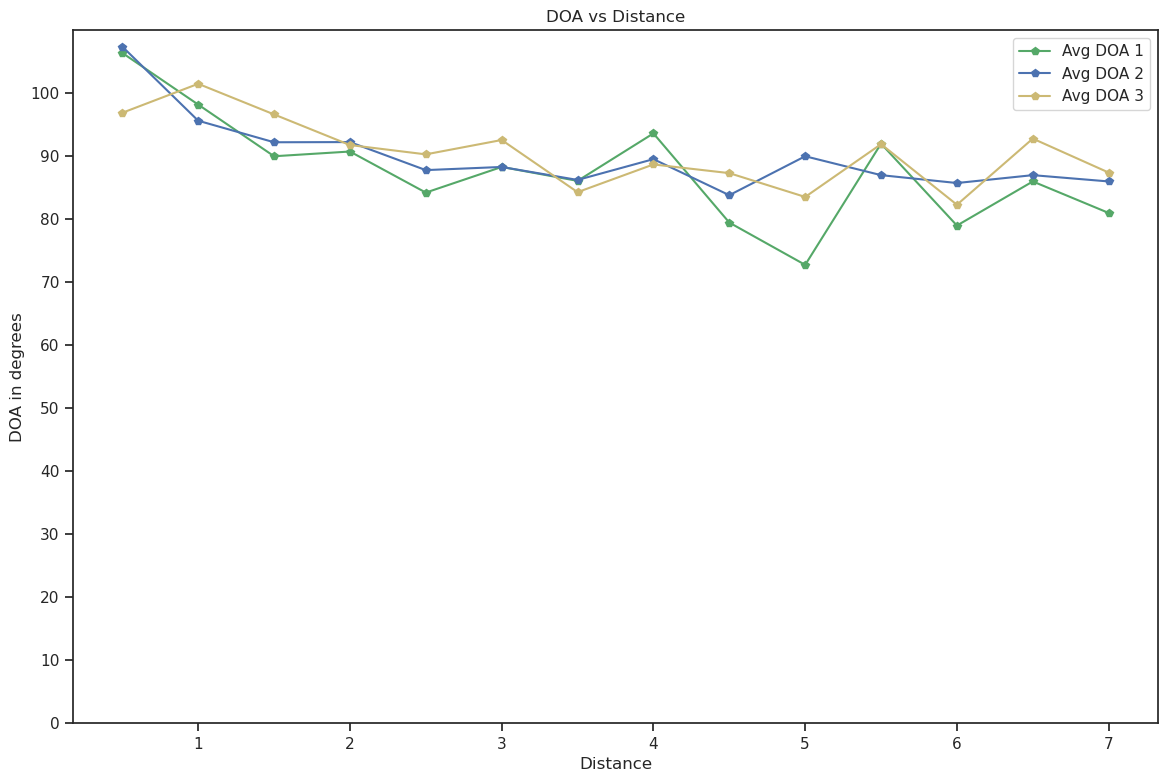

In [20]:
avg_doa = [106.4,98.2,90,90.75,84.23,88.3,86.09,93.63,79.47,72.76,92,79,86,81]
avg_doa2 = [107.4,95.64,92.22,92.25,87.8,88.3,86.24,89.54,83.82,90,87,85.75,87,86]
avg_doa3 = [96.9,101.5,96.64,91.78,90.3,92.58,84.3,88.7,87.32,83.54,91.92,82.3,92.8,87.41]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0,110)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

In [26]:
r = sr.Recognizer()
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.027210884353741496
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.04081632653061224
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.013605442176870748
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.

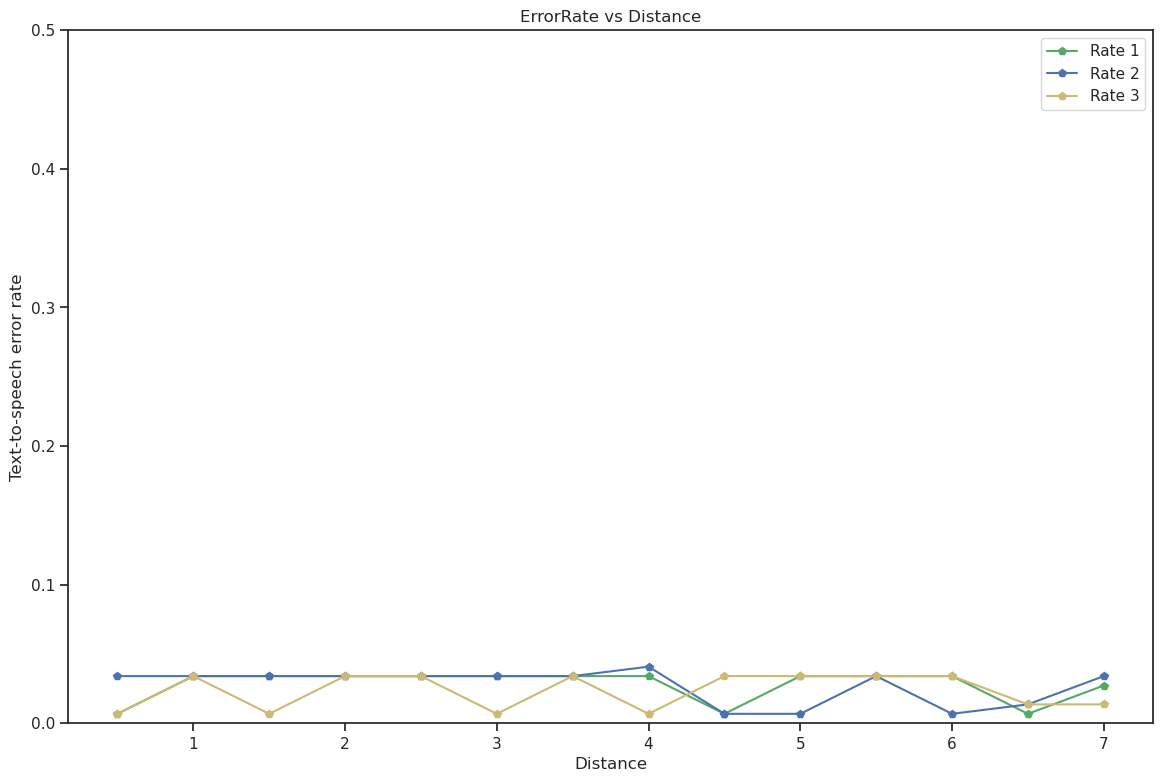

In [27]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.5)
plt.legend()
plt.show()

In [28]:
error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)


Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.0476190

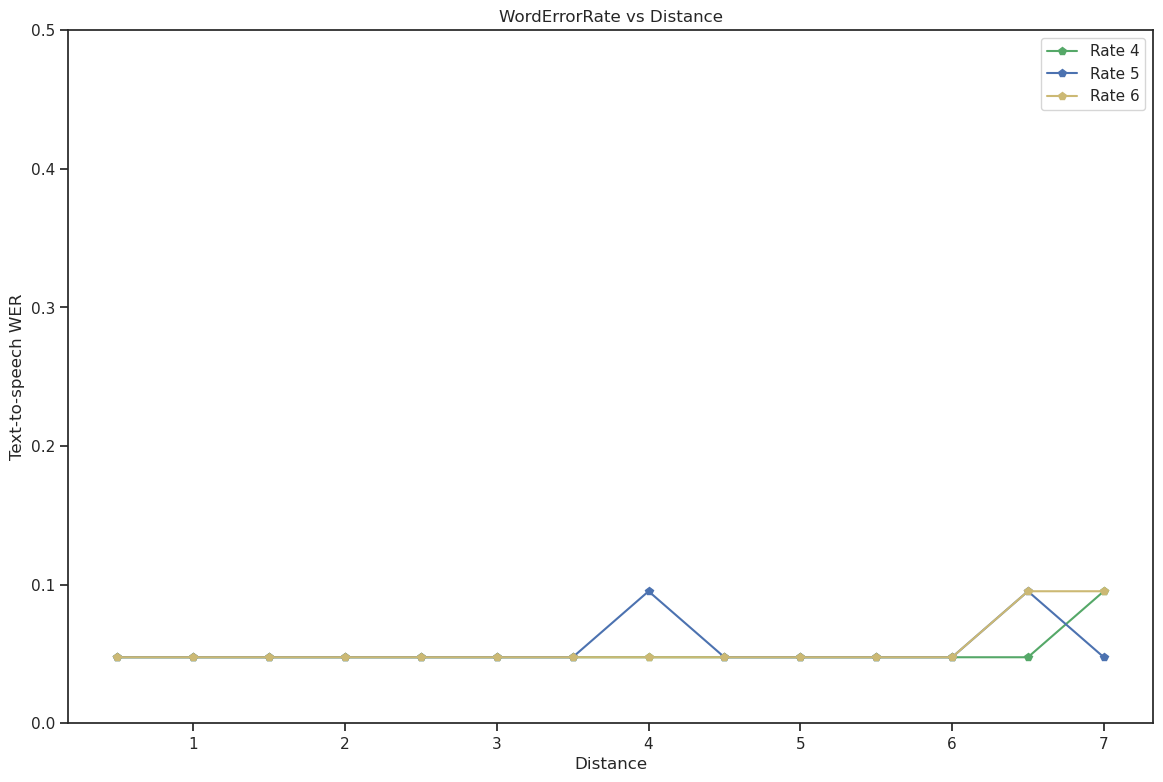

In [29]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech WER')
plt.title('WordErrorRate vs Distance')
plt.ylim(0,0.5)
plt.legend()
plt.show()